# SUPPORT VECTOR MACHINES (SVM):
# CANCER

INSTANCIAS:
?

CARACTERISTICAS
VARIABLE OBJETIVO
2 categorias (Mujeres - Hombres)

PREDICTORES
?

In [1]:
# importamos las librerias correspondientes

#para manipulacion de data frame
import pandas as pd
#gestion de rutas y directorios
import os 
#para graficos
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import scatter_matrix
#magic que permite representar graficos dentro del notebook
%matplotlib inline 
#disposicion de argumentos de entrada para ML
import numpy as np
#estadisticos de base
from scipy import stats
#particiones para muestras
from sklearn.model_selection import train_test_split
#Clasificador Support Vector Machines
from sklearn.svm import SVC
#metricas de desempeño
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [2]:
# CARGAMOS DATOS
data = pd.read_csv('Breast_cancer_data.csv')
#vista general de los datos
data.info()
#imputamos los datos conitnuos vacíos a la media
data=data.fillna(data.mean())
data.info()
#removemos columnas con NaN
#data=data.dropna() 
#data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [5]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
count = data.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'count')

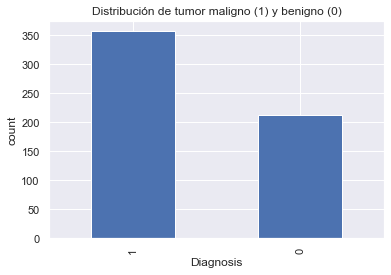

In [7]:
count.plot(kind='bar', edgecolor="white")
plt.title("Distribución de tumor maligno (1) y benigno (0)")
plt.xlabel("Diagnosis")
plt.ylabel("count")

In [8]:
# DISPONEMOS NUESTROS DATOS COMO ARREGLOS EN NUMPY PARA UTILIZARLOS COMO ARGUMENTOS DE ENTRADA GENERICOS

#variable objetivo
y=data.diagnosis.astype('category')
#predictores
x=data.drop(['diagnosis'], axis=1)
#mostramos resultados
#print(y)
#print(x)


C:\Users\arduragr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\arduragr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


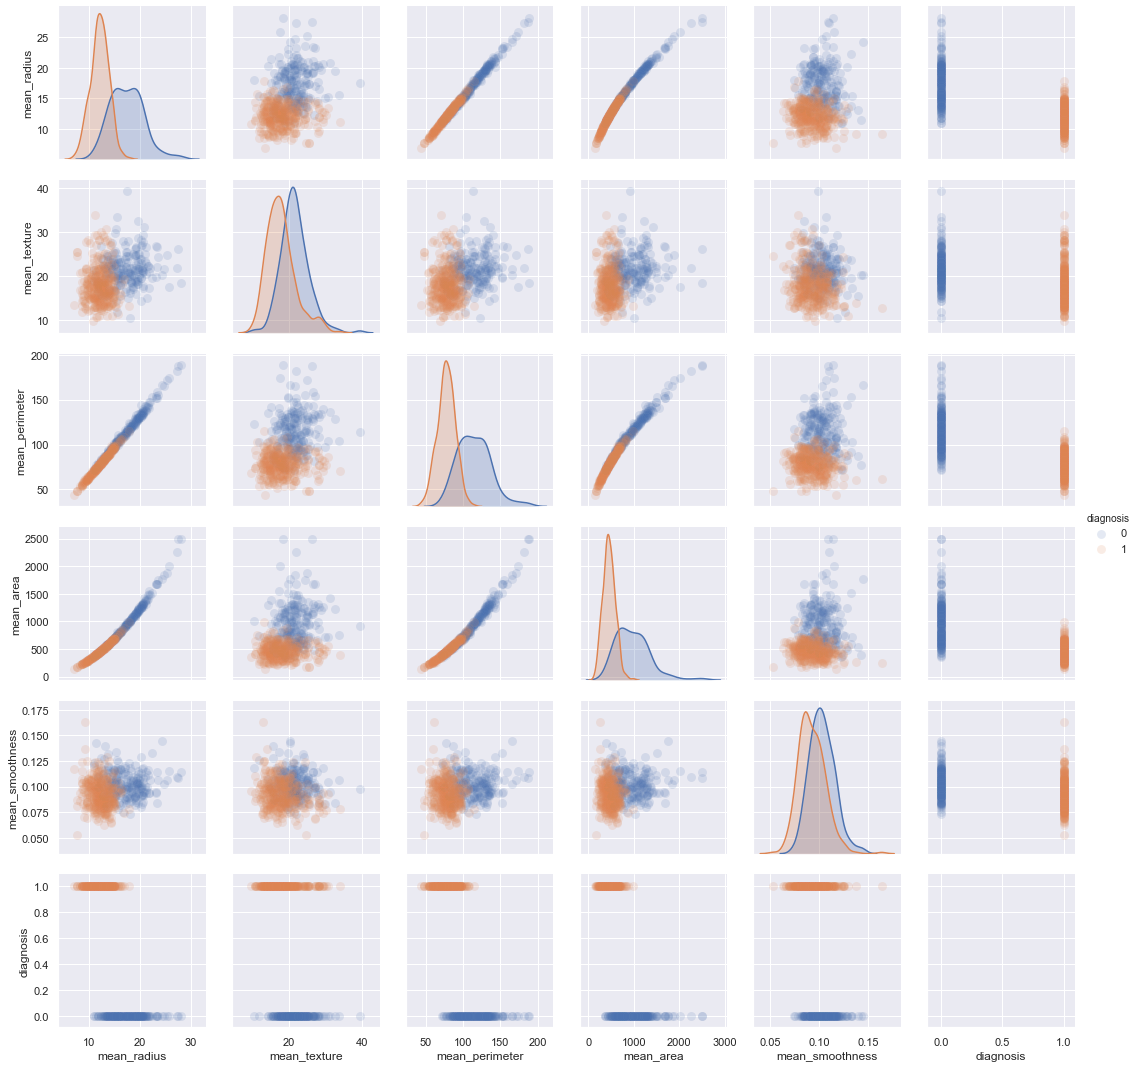

In [9]:
sns.pairplot(data, kind="scatter", hue="diagnosis", plot_kws=dict(s=80, edgecolor="white", linewidth=0.1, alpha = 0.15))
plt.show()

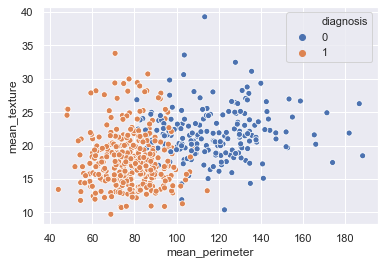

In [10]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data= data, hue=y, edgecolor="white")

In [11]:
#Particion de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(x_train.shape); print(x_test.shape)

(398, 5)
(171, 5)


In [12]:
#Kernel Lineal
model = SVC(kernel='linear', gamma='auto')
#entrenamiento
model.fit(x_train, y_train)
#prediccion
y_pred = model.predict(x_test)


#desempeño
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 49   7]
 [ 10 105]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        56
           1       0.94      0.91      0.93       115

    accuracy                           0.90       171
   macro avg       0.88      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [ ]:
#estimamos el modelo con un kernel polinomial
model = SVC(kernel='poly',gamma='auto')
#entrenamiento
model.fit(x_train, y_train)
#prediccion
y_pred = model.predict(x_test)
#desempeño
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#estimamos el modelo con un kernel radial 
model = SVC(kernel='rbf', gamma=5)
#entrenamiento
model.fit(x_train, y_train)
#prediccion
y_pred = model.predict(x_test)
#desempeño
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#estimamos el modelo con un kernel sigmoidial
model = SVC(kernel='sigmoid',gamma='auto')
#entrenamiento
model.fit(x_train, y_train)
#prediccion
y_pred = model.predict(x_test)
#desempeño
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))